https://youtu.be/d3PqpaOb_Gs : Video explanation of strategy and code

In [137]:
#import libraries
import pandas_datareader as pdr
import numpy as np
from matplotlib import pyplot as plt
import datetime
%matplotlib inline

In [138]:
#define date range
START = datetime.datetime(2000, 1, 1)
END = datetime.datetime(2020, 12, 31)
YEARS = (END - START).days/ 365.25

In [139]:
#define starting variables
STARTING_BALANCE = 10000
PCT_THRESH = 20

In [140]:
#download data
price = pdr.get_data_yahoo('^GSPC', START, END)

price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [141]:
#drop redundant columns
price = price.drop(['Volume', 'Adj Close'], 1)

price.tail()

,High,Low,Open,Close
Date,,,,
2020-12-24,3703.820068,3689.320068,3694.030029,3703.060059
2020-12-28,3740.510010,3723.030029,3723.030029,3735.360107
2020-12-29,3756.120117,3723.310059,3750.010010,3727.040039
2020-12-30,3744.629883,3730.209961,3736.189941,3732.040039
2020-12-31,3760.199951,3726.879883,3733.270020,3756.070068


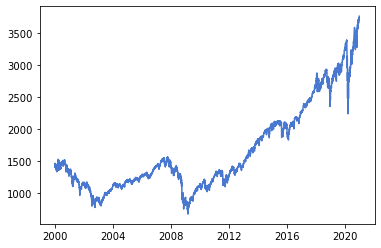

In [142]:
#plot chart
plt.style.use('seaborn-muted')
plt.plot(price.Close)
plt.show()

In [143]:
#calculate benchmark return and balance
price['Return'] = price.Close / price.Close.shift(1)
price.Return.iat[0] = 1
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

,High,Low,Open,Close,Return,Bench_Bal
Date,,,,,,
2020-12-24,3703.820068,3689.320068,3694.030029,3703.060059,1.003537,25446.737491
2020-12-28,3740.510010,3723.030029,3723.030029,3735.360107,1.008723,25668.697397
2020-12-29,3756.120117,3723.310059,3750.010010,3727.040039,0.997773,25611.523440
2020-12-30,3744.629883,3730.209961,3736.189941,3732.040039,1.001342,25645.882507
2020-12-31,3760.199951,3726.879883,3733.270020,3756.070068,1.006439,25811.012383


In [144]:
#calculate benchmark drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()
price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round(((price.Bench_DD / price.Bench_Peak).min() * 100), 2)

bench_dd

-56.78

In [145]:
#calculate additional columns for strategy

#daily range
price['Range'] = price.High - price.Low
#distance between close and daily low
price['Dist'] = abs(price.Close - price.Low)
#distance as % of range
price['Pct'] = (price.Dist / price.Range) * 100

price.tail()

,High,Low,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Range,Dist,Pct
Date,,,,,,,,,,,
2020-12-24,3703.820068,3689.320068,3694.030029,3703.060059,1.003537,25446.737491,25580.187569,-133.450078,14.500000,13.739990,94.758553
2020-12-28,3740.510010,3723.030029,3723.030029,3735.360107,1.008723,25668.697397,25668.697397,0.000000,17.479980,12.330078,70.538283
2020-12-29,3756.120117,3723.310059,3750.010010,3727.040039,0.997773,25611.523440,25668.697397,-57.173957,32.810059,3.729980,11.368405
2020-12-30,3744.629883,3730.209961,3736.189941,3732.040039,1.001342,25645.882507,25668.697397,-22.814890,14.419922,1.830078,12.691318
2020-12-31,3760.199951,3726.879883,3733.270020,3756.070068,1.006439,25811.012383,25811.012383,0.000000,33.320068,29.190186,87.605419


In [146]:
#identify entries and allocate trading fees
price['Long'] = price.Pct < PCT_THRESH

In [147]:
#calculate system return and balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)
price['Sys_Bal'] = (STARTING_BALANCE * price.Sys_Ret.cumprod())

price.tail()

,High,Low,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Range,Dist,Pct,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,,,,,,,
2020-12-24,3703.820068,3689.320068,3694.030029,3703.060059,1.003537,25446.737491,25580.187569,-133.450078,14.500000,13.739990,94.758553,False,1.003537,61611.928467
2020-12-28,3740.510010,3723.030029,3723.030029,3735.360107,1.008723,25668.697397,25668.697397,0.000000,17.479980,12.330078,70.538283,False,1.000000,61611.928467
2020-12-29,3756.120117,3723.310059,3750.010010,3727.040039,0.997773,25611.523440,25668.697397,-57.173957,32.810059,3.729980,11.368405,True,1.000000,61611.928467
2020-12-30,3744.629883,3730.209961,3736.189941,3732.040039,1.001342,25645.882507,25668.697397,-22.814890,14.419922,1.830078,12.691318,True,1.001342,61694.583775
2020-12-31,3760.199951,3726.879883,3733.270020,3756.070068,1.006439,25811.012383,25811.012383,0.000000,33.320068,29.190186,87.605419,False,1.006439,62091.825669


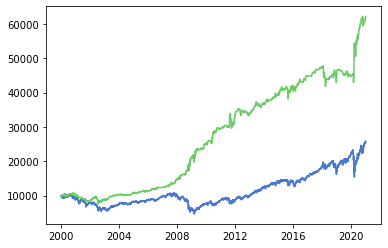

In [148]:
#plot balance
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal)

plt.show()

In [149]:
#calculate system drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round(((price.Sys_DD / price.Sys_Peak).min()) * 100, 2)

sys_dd

-29.45

In [150]:
#calculate metrics
bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal[-1]/price.Sys_Bal[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)
sys_in_market = round((price.Long.value_counts().loc[True] / len(price)) * 100)
sys_win = price.Sys_Ret[price.Sys_Ret > 1.0].count()
sys_loss = price.Sys_Ret[price.Sys_Ret < 1.0].count()
sys_winrate = round(sys_win / (sys_win + sys_loss) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'Time in Market: {sys_in_market}%')
print(f'Trades Won: {sys_win}')
print(f'Trades Loss: {sys_loss}')
print(f'Winrate: {sys_winrate}%')

Benchmark Total return: 158.11%
Benchmark CAGR: 4.62
Benchmark DD: -56.78%

System Total return: 520.92%
System CAGR: 9.08
System DD: -29.45%
Time in Market: 21.0%
Trades Won: 661
Trades Loss: 452
Winrate: 59.39%


In [151]:
#define list of ETFs to backtest
symbols = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^N225']

In [152]:
#create backtesting function
def backtest(symbol):
    #download data
    price = pdr.get_data_yahoo(symbol, START, END)
    
    #drop redundant columns
    price = price.drop(['Volume', 'Adj Close'], 1)
    
    #calculate benchmark return and balance
    price['Return'] = price.Close / price.Close.shift(1)
    price.Return.iat[0] = 1
    price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()
    
    #calculate benchmark drawdown
    price['Bench_Peak'] = price.Bench_Bal.cummax()
    price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak
    
    #calculate additional columns for strategy
    #daily range
    price['Range'] = price.High - price.Low
    #distance between close and daily low
    price['Dist'] = abs(price.Close - price.Low)
    #distance as % of range
    price['Pct'] = (price.Dist / price.Range) * 100
    
    #identify entries and allocate trading fees
    price['Long'] = price.Pct < PCT_THRESH
    
    #calculate system return and balance
    price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    price['Sys_Bal'] = (STARTING_BALANCE * price.Sys_Ret.cumprod())
    
    #calculate system drawdown
    price['Sys_Peak'] = price.Sys_Bal.cummax()
    price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak
    
    #calculate metrics
    bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
    bench_dd = round((price.Bench_DD / price.Bench_Peak).min() * 100, 2)
    sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)
    sys_dd = round(((price.Sys_DD / price.Sys_Peak).min()) * 100, 2)
    
    return bench_cagr, sys_cagr

In [153]:
#backtest multiple symbols
bc = []
sc = []


for symbol in symbols:
    bench_cagr, sys_cagr = backtest(symbol)
    bc.append(bench_cagr)
    sc.append(sys_cagr)

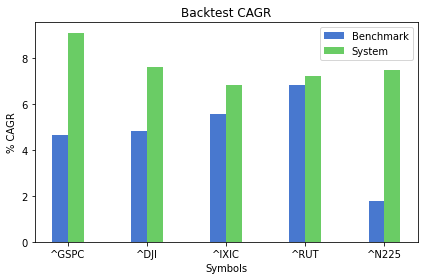

In [154]:
#plot data
x_indices = np.arange(len(symbols))
width = 0.2

plt.bar(x_indices - width / 2, bc, width = width, label = 'Benchmark')
plt.bar(x_indices + width / 2, sc, width = width, label = 'System')
   
plt.xticks(ticks = x_indices, labels = symbols)

plt.legend()

plt.title('Backtest CAGR')
plt.xlabel('Symbols')
plt.ylabel('% CAGR')
plt.tight_layout()

plt.show()